# DS203 Project

# Sustainability and Utilisation of Energy Sources

## Exploratory Data Analysis & Data Visualization

<ol>
<li> Import the necessary libraries
<li> Read the data file into a data frame and display a portion of the data 
<li> Print the number of records and variables
<li> Print the datatype of each variable
<li> For each variable, print the number of unique values
<li> Identify redundant columns and drop them
<li> Identify nominal/categorical, ordinal, temporal (time stamps), integer (native but not nominal or ordinal), and continuous variables
<li> Identify countries with excessive null values and drop them
</ol>
For continious variables
<ol>
<li> For each variable, print mean, variance, skew, min, max, median, 25th percentile, 75th
percentile, and inter-quartile range.
<li> For each variable, plot box-and-whiskers plots.
<li> For each variable, plot the histogram three times: with too few bins, too many bins, good
number of bins.
<li> For each variable, use QQ-plot to see the extent to which the variable deviates from
normal distribution, and how (left-skew, right-skew, or more like uniform distribution)
<li> For each variable, check if the variable deviates is log-normal.
</ol>

### 1. Import the necessary libraries

In [3]:
import pandas as pd
import numpy as np
import geopandas as gpd
import shapefile as shp
from sklearn.linear_model import LinearRegression

### 2. Read the data file into a data frame and display a portion of the data 

In [4]:
pd.set_option("display.max_rows",10, "display.max_columns", 20) # Setting the number of maximum rows and columns to display in the PANDAS library
df = pd.read_excel("data/bp-stats-review-2021-consolidated-dataset-panel-format.xlsx") # Importing the excel sheet
df

,Country,Year,pop,ISO3166_alpha3,ISO3166_numeric,Region,SubRegion,OPEC,EU,OECD,...,ren_power_mtoe,ren_power_twh,renewables_ej,renewables_mtoe,solar_ej,solar_mtoe,solar_twh,wind_ej,wind_mtoe,wind_twh
0,Algeria,1965,12.550880,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Algeria,1966,12.902626,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Algeria,1967,13.275020,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Algeria,1968,13.663581,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Algeria,1969,14.061724,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6624,Zimbabwe,2016,14.030338,ZWE,716.0,Africa,Eastern Africa,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6625,Zimbabwe,2017,14.236599,ZWE,716.0,Africa,Eastern Africa,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6626,Zimbabwe,2018,14.438812,ZWE,716.0,Africa,Eastern Africa,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6627,Zimbabwe,2019,14.645473,ZWE,716.0,Africa,Eastern Africa,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3. Print the number of records and variables

In [5]:
records, variables = df.shape
print(f"records = {records}, variables = {variables}")

records = 6629, variables = 95


### 4. Print the datatype of each variable

In [6]:
df.dtypes

Country             object
Year                 int64
pop                float64
ISO3166_alpha3      object
ISO3166_numeric    float64
                    ...   
solar_mtoe         float64
solar_twh          float64
wind_ej            float64
wind_mtoe          float64
wind_twh           float64
Length: 95, dtype: object

### 5. For each variable, print the number of unique values

In [7]:
pd.set_option("display.max_rows", 69)
pd.DataFrame(df.nunique())

,0
Country,123
Year,56
pop,6583
ISO3166_alpha3,107
ISO3166_numeric,107
...,...
solar_mtoe,1602
solar_twh,1401
wind_ej,1811
wind_mtoe,1810


### 6. Identify redundant columns and drop them

In [8]:
(df.columns)

Index(['Country', 'Year', 'pop', 'ISO3166_alpha3', 'ISO3166_numeric', 'Region',
       'SubRegion', 'OPEC', 'EU', 'OECD', 'CIS', 'biodiesel_cons_kbd',
       'biodiesel_cons_kboed', 'biodiesel_cons_ktoe', 'biodiesel_cons_pj',
       'biodiesel_prod_kbd', 'biodiesel_prod_kboed', 'biodiesel_prod_ktoe',
       'biodiesel_prod_pj', 'biofuels_cons_ej', 'biofuels_cons_kbd',
       'biofuels_cons_kboed', 'biofuels_cons_ktoe', 'biofuels_cons_mtoe',
       'biofuels_cons_pj', 'biofuels_prod_kbd', 'biofuels_prod_kboed',
       'biofuels_prod_ktoe', 'biofuels_prod_pj', 'biogeo_ej', 'biogeo_mtoe',
       'biogeo_twh', 'co2_mtco2', 'coalcons_ej', 'coalcons_mtoe',
       'coalprod_ej', 'coalprod_mt', 'coalprod_mtoe', 'cobalt_kt', 'elect_twh',
       'electbyfuel_coal', 'electbyfuel_gas', 'electbyfuel_oil',
       'ethanol_cons_kbd', 'ethanol_cons_kboed', 'ethanol_cons_ktoe',
       'ethanol_cons_pj', 'ethanol_prod_kbd', 'ethanol_prod_kboed',
       'ethanol_prod_ktoe', 'ethanol_prod_pj', 'gascons_bc

One can observe that many columns represent the measurement of identical quantities in different units. Therefore, we will drop all columns that repeat this reading and only keep the measurements in one particular unit. 


In [9]:
['Country', # Country
'Year', # year of data measurement
'pop', # population
'Region',    # Geographical regions
'SubRegion', # Geographical subregions
'OPEC', 'EU', 'OECD', 'CIS'] # one-hot bit encoding for country member classes (i.e. OPEC member or non-member )
# all columns chosen

# biodiesel
['biodiesel_cons_kbd','biodiesel_cons_kboed', 'biodiesel_cons_ktoe', 'biodiesel_cons_pj',
'biodiesel_prod_kbd', 'biodiesel_prod_kboed', 'biodiesel_prod_ktoe',
'biodiesel_prod_pj']
# chosen column = 'biodiesel_prod_pj'

# biofuel
['biofuels_cons_ej', 'biofuels_cons_kbd',
'biofuels_cons_kboed', 'biofuels_cons_ktoe', 'biofuels_cons_mtoe',
'biofuels_cons_pj', 'biofuels_prod_kbd', 'biofuels_prod_kboed',
'biofuels_prod_ktoe', 'biofuels_prod_pj']
# chosen column = 'biofuels_prod_pj'

# geothermal, biomass and others
['biogeo_ej', 'biogeo_mtoe',
'biogeo_twh']
# chosen column = biogeo_ej

# co2
['co2_mtco2']

# coal
['coalcons_ej', 'coalcons_mtoe', 'coalprod_ej', 'coalprod_mt', 'coalprod_mtoe']
# chosen column = 'coalprod_ej'

# electricity
['elect_twh', 'electbyfuel_coal', 'electbyfuel_gas', 'electbyfuel_oil']
# chosen column = all

# ethanol
['ethanol_cons_kbd', 'ethanol_cons_kboed', 'ethanol_cons_ktoe','ethanol_cons_pj', 'ethanol_prod_kbd', 'ethanol_prod_kboed',
'ethanol_prod_ktoe', 'ethanol_prod_pj']
# chosen column = 'ethanol_prod_pj'

# gas
['gascons_bcfd', 'gascons_bcm', 'gascons_ej',
'gascons_mtoe', 'gasprod_bcfd', 'gasprod_bcm', 'gasprod_ej',
'gasprod_mtoe', 'gasreserves_tcm']
# chosen column = 'gasprod_ej'

# hydro
['hydro_ej','hydro_mtoe', 'hydro_twh']
# chosen column = 'hydro_ej'

# nuclear
['nuclear_ej', 'nuclear_mtoe', 'nuclear_twh']
# chosen column = 'nuclear_ej'

# oil
['oilcons_ej', 'oilcons_kbd', 'oilcons_mt', 'oilcons_mtoe', 'oilprod_crudecond_kbd', 'oilprod_kbd',
'oilprod_mt', 'oilprod_ngl_kbd', 'oilreserves_bbl']
#chosen column = 'oilcons_ej'

# primary energy
['primary_ej',
'primary_gj_pc', 'primary_mtoe']
# chosen column = 'primary_ej'

# renewables
['ren_power_ej', 'ren_power_mtoe', 'ren_power_twh',
'renewables_ej', 'renewables_mtoe']
#chosen column = 'ren_power_ej'

# solar
['solar_ej', 'solar_mtoe', 'solar_twh']
# chosen column = 'solar_ej'

# wind
['wind_ej', 'wind_mtoe', 'wind_twh']
# chosen column = 'wind_ej'

'''
The following columns will be dropped as they are not useful for our analysis
'''
['ISO3166_alpha3', 'ISO3166_numeric', # ISO 3166 codes - these have a 1-to-1 mapping with country
'cobalt_kt',   # cobalt production reserves
'graphite_kt', # graphite production reserves
'liqcons_kbd',   # Total Liquid fuel consumption
'lithium_kt',    # Lithium Production
'rareearths_kt', # rare earth material reserves
'refcap_kbd',    # oil refining capacity
'refthru_kbd']   # oil refinery throughput

chosen_columns = ['Country', 'Year', 'pop', 'Region', 'SubRegion', 'OPEC', 'EU', 'OECD', 'CIS',
 'biodiesel_prod_pj', 'biofuels_prod_pj','biogeo_ej', 'co2_mtco2', 'coalprod_ej',
 'elect_twh', 'electbyfuel_coal', 'electbyfuel_gas', 'electbyfuel_oil','ethanol_prod_pj',
 'gasprod_ej', 'hydro_ej','nuclear_ej','oilcons_ej','primary_ej','ren_power_ej','solar_ej','wind_ej']

Dropping the columns with more than 80% NaN values

In [10]:
filter1 = chosen_columns
percent_nulls = df.isnull().sum()*100/df.shape[0]
drop_columns = percent_nulls[percent_nulls > 80]
drop_columns = list(pd.DataFrame(drop_columns).index)
filter2 = drop_columns
filter = [i for i in filter1 if not i in filter2]
df[filter]

,Country,Year,pop,Region,SubRegion,OPEC,EU,OECD,CIS,biogeo_ej,...,electbyfuel_gas,electbyfuel_oil,gasprod_ej,hydro_ej,nuclear_ej,oilcons_ej,primary_ej,ren_power_ej,solar_ej,wind_ej
0,Algeria,1965,12.550880,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.00400,0.0,0.055459,0.089139,0.0,0.0,0.0
1,Algeria,1966,12.902626,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.00355,0.0,0.072982,0.107168,0.0,0.0,0.0
2,Algeria,1967,13.275020,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.00410,0.0,0.068191,0.101426,0.0,0.0,0.0
3,Algeria,1968,13.663581,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.00563,0.0,0.072602,0.108879,0.0,0.0,0.0
4,Algeria,1969,14.061724,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.00361,0.0,0.076701,0.120508,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6624,Zimbabwe,2016,14.030338,Africa,Eastern Africa,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6625,Zimbabwe,2017,14.236599,Africa,Eastern Africa,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6626,Zimbabwe,2018,14.438812,Africa,Eastern Africa,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6627,Zimbabwe,2019,14.645473,Africa,Eastern Africa,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 7. Identify nominal/categorical, ordinal, temporal (time stamps), integer (native but not nominal or ordinal), and continuous variables

In [11]:
df[filter].columns

Index(['Country', 'Year', 'pop', 'Region', 'SubRegion', 'OPEC', 'EU', 'OECD',
       'CIS', 'biogeo_ej', 'co2_mtco2', 'coalprod_ej', 'elect_twh',
       'electbyfuel_coal', 'electbyfuel_gas', 'electbyfuel_oil', 'gasprod_ej',
       'hydro_ej', 'nuclear_ej', 'oilcons_ej', 'primary_ej', 'ren_power_ej',
       'solar_ej', 'wind_ej'],
      dtype='object')

In [12]:
df[filter].dtypes

Country              object
Year                  int64
pop                 float64
Region               object
SubRegion            object
OPEC                float64
EU                  float64
OECD                float64
CIS                 float64
biogeo_ej           float64
co2_mtco2           float64
coalprod_ej         float64
elect_twh           float64
electbyfuel_coal    float64
electbyfuel_gas     float64
electbyfuel_oil     float64
gasprod_ej          float64
hydro_ej            float64
nuclear_ej          float64
oilcons_ej          float64
primary_ej          float64
ren_power_ej        float64
solar_ej            float64
wind_ej             float64
dtype: object

| Column | Type |
| ------- | ------ |
|'Country'       | Categorical |
'pop'           | Continous  
'Region'        | Categorical|    
'Year'          |Temporal  |
'SubRegion'     | Categorical | 
'EU'            | One-hot-bit encoding|  
'OPEC'          | One-hot-bit encoding | 
'OECD'          | One-hot-bit encoding | 
'CIS'           | One-hot-bit encoding | 
'biogeo_ej'     | Continuous | 
'co2_mtco2'     | Continuous | 
'coalprod_ej'   | Continuous |
'elect_twh'     | Continuous | 
'electbyfuel_coal'|Continuous |  
'electbyfuel_gas' | Continuous| 
'electbyfuel_oil | Continuous |
'gasprod_ej' | Continuous |
'hydro_ej' | Continuous |
'nuclear_ej' | Continuous | 
'oilcons_ej' | Continuous | 
'primary_ej | Continuous  |
'ren_power_ej' | Continuous | 
'solar_ej'| Continuous  |
'wind_ej' | Continuous  |

### 8. Identify countries with excessive null values and drop them

In [13]:
grp = df[filter].groupby('Country')
df_temp = grp.get_group("India")
df_temp.isnull().sum()/df_temp.shape[0]*100

Country              0.000000
Year                 0.000000
pop                  0.000000
Region               0.000000
SubRegion            0.000000
OPEC                 0.000000
EU                   0.000000
OECD                 0.000000
CIS                  0.000000
biogeo_ej            0.000000
co2_mtco2            0.000000
coalprod_ej         28.571429
elect_twh           35.714286
electbyfuel_coal    35.714286
electbyfuel_gas     35.714286
electbyfuel_oil     35.714286
gasprod_ej           8.928571
hydro_ej             0.000000
nuclear_ej           0.000000
oilcons_ej           0.000000
primary_ej           0.000000
ren_power_ej         0.000000
solar_ej             0.000000
wind_ej              0.000000
dtype: float64

In [14]:
countries = df['Country'].unique()

In [15]:
print(filter[9:])

['biogeo_ej', 'co2_mtco2', 'coalprod_ej', 'elect_twh', 'electbyfuel_coal', 'electbyfuel_gas', 'electbyfuel_oil', 'gasprod_ej', 'hydro_ej', 'nuclear_ej', 'oilcons_ej', 'primary_ej', 'ren_power_ej', 'solar_ej', 'wind_ej']


In [16]:
grp = df[filter].groupby('Country')
df_dict = {'Country':[]}
for column in filter[9:]:
    df_dict[column] = []

for country in countries:
    df_dict['Country'].append(country)
    for column in filter[9:]:
        df_temp = grp.get_group(country)[column]
        percent_nulls = df_temp.isnull().sum()/df_temp.shape[0]*100
        df_dict[column].append(percent_nulls)
        #df_dict[column] =  [country] + list(pd.DataFrame(percent_nulls[0]))
df_percent_nulls = pd.DataFrame(df_dict)
df_percent_nulls.set_index('Country', inplace = True)
df_percent_nulls

,biogeo_ej,co2_mtco2,coalprod_ej,elect_twh,electbyfuel_coal,electbyfuel_gas,electbyfuel_oil,gasprod_ej,hydro_ej,nuclear_ej,oilcons_ej,primary_ej,ren_power_ej,solar_ej,wind_ej
Country,,,,,,,,,,,,,,,
Algeria,0.0,0.0,100.000000,35.714286,100.000000,100.000000,100.000000,8.928571,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Angola,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.0,100.0,100.0,100.0,100.0,100.0
Argentina,0.0,0.0,100.000000,35.714286,35.714286,35.714286,35.714286,8.928571,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Australia,0.0,0.0,28.571429,35.714286,35.714286,35.714286,35.714286,8.928571,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Austria,0.0,0.0,100.000000,35.714286,100.000000,100.000000,100.000000,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0.0,0.0,28.571429,35.714286,100.000000,100.000000,100.000000,8.928571,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Vietnam,0.0,0.0,28.571429,35.714286,35.714286,35.714286,35.714286,8.928571,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Yemen,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,8.928571,100.0,100.0,100.0,100.0,100.0,100.0,100.0


In [17]:
filt2 = df['Year']>2000
dfx = df[filter]
dfx[filt2]


,Country,Year,pop,Region,SubRegion,OPEC,EU,OECD,CIS,biogeo_ej,...,electbyfuel_gas,electbyfuel_oil,gasprod_ej,hydro_ej,nuclear_ej,oilcons_ej,primary_ej,ren_power_ej,solar_ej,wind_ej
36,Algeria,2001,31.451513,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,3.113011,0.000686,0.0,0.384391,1.118882,0.0,0.0,0.0
37,Algeria,2002,31.855110,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,3.201897,0.000563,0.0,0.426230,1.158986,0.0,0.0,0.0
38,Algeria,2003,32.264159,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,3.378873,0.002599,0.0,0.443427,1.212752,0.0,0.0,0.0
39,Algeria,2004,32.692153,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,3.313978,0.002446,0.0,0.463489,1.259042,0.0,0.0,0.0
40,Algeria,2005,33.149720,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,3.056823,0.005377,0.0,0.483168,1.318231,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6624,Zimbabwe,2016,14.030338,Africa,Eastern Africa,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6625,Zimbabwe,2017,14.236599,Africa,Eastern Africa,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6626,Zimbabwe,2018,14.438812,Africa,Eastern Africa,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6627,Zimbabwe,2019,14.645473,Africa,Eastern Africa,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
for year in df['Year'].unique():
    for country in df['Country'].unique():
        filt_country = df['Country'] == country 
        filt_year = df['Year'] == year
        filt_total = filt_country & filt_year
        print(df[filt_total])
        break

   Country  Year       pop ISO3166_alpha3  ISO3166_numeric  Region  \
0  Algeria  1965  12.55088            DZA             12.0  Africa   

         SubRegion  OPEC   EU  OECD  ...  ren_power_mtoe  ren_power_twh  \
0  Northern Africa   1.0  0.0   0.0  ...             0.0            0.0   

   renewables_ej  renewables_mtoe  solar_ej  solar_mtoe  solar_twh  wind_ej  \
0            0.0              0.0       0.0         0.0        0.0      0.0   

   wind_mtoe  wind_twh  
0        0.0       0.0  

[1 rows x 95 columns]
   Country  Year        pop ISO3166_alpha3  ISO3166_numeric  Region  \
1  Algeria  1966  12.902626            DZA             12.0  Africa   

         SubRegion  OPEC   EU  OECD  ...  ren_power_mtoe  ren_power_twh  \
1  Northern Africa   1.0  0.0   0.0  ...             0.0            0.0   

   renewables_ej  renewables_mtoe  solar_ej  solar_mtoe  solar_twh  wind_ej  \
1            0.0              0.0       0.0         0.0        0.0      0.0   

   wind_mtoe  wind_twh 

In [ ]:
threshold = 70
for column in filter[9:]:
    filt = ( df_percent_nulls[column] > threshold )
    percent_column_nulls = np.sum(filt)/123
    print(column)
    print(filt)

biogeo_ej
Country
Algeria      False
Angola        True
Argentina    False
Australia    False
Austria      False
             ...  
Venezuela    False
Vietnam      False
Yemen         True
Zambia        True
Zimbabwe      True
Name: biogeo_ej, Length: 123, dtype: bool
co2_mtco2
Country
Algeria      False
Angola        True
Argentina    False
Australia    False
Austria      False
             ...  
Venezuela    False
Vietnam      False
Yemen         True
Zambia        True
Zimbabwe      True
Name: co2_mtco2, Length: 123, dtype: bool
coalprod_ej
Country
Algeria       True
Angola        True
Argentina     True
Australia    False
Austria       True
             ...  
Venezuela    False
Vietnam      False
Yemen         True
Zambia        True
Zimbabwe     False
Name: coalprod_ej, Length: 123, dtype: bool
elect_twh
Country
Algeria      False
Angola        True
Argentina    False
Australia    False
Austria      False
             ...  
Venezuela    False
Vietnam      False
Yemen         True


In [ ]:

pd.set_option("display.max_rows", 10, "display.max_columns", 20)
df1[df1 < 56]

Bolivia                         51
Myanmar                         51
Bangladesh                      50
Papua New Guinea                41
Zimbabwe                        40
                                ..
Madagascar                      26
Democratic Republic of Congo    26
Cuba                            26
Zambia                          26
New Caledonia                   26
Name: Country, Length: 13, dtype: int64

In [ ]:
pd.set_option("display.max_rows", 10, "display.max_columns", 20)
df2 = df['Region'].value_counts()
df2

Europe                1888
Asia Pacific          1160
Africa                 902
S. & Cent. America     637
Middle East            616
CIS                    392
North America          168
Name: Region, dtype: int64

In [ ]:
df2.value_counts()

1888    1
1160    1
902     1
637     1
616     1
392     1
168     1
Name: Region, dtype: int64

In [ ]:
grp = df.groupby(['Country'])

In [ ]:
df.dtypes

Country             object
Year                 int64
pop                float64
ISO3166_alpha3      object
ISO3166_numeric    float64
                    ...   
solar_mtoe         float64
solar_twh          float64
wind_ej            float64
wind_mtoe          float64
wind_twh           float64
Length: 95, dtype: object

In [ ]:
df.columns.nunique

<bound method IndexOpsMixin.nunique of Index(['Country', 'Year', 'pop', 'ISO3166_alpha3', 'ISO3166_numeric', 'Region',
       'SubRegion', 'OPEC', 'EU', 'OECD', 'CIS', 'biodiesel_cons_kbd',
       'biodiesel_cons_kboed', 'biodiesel_cons_ktoe', 'biodiesel_cons_pj',
       'biodiesel_prod_kbd', 'biodiesel_prod_kboed', 'biodiesel_prod_ktoe',
       'biodiesel_prod_pj', 'biofuels_cons_ej', 'biofuels_cons_kbd',
       'biofuels_cons_kboed', 'biofuels_cons_ktoe', 'biofuels_cons_mtoe',
       'biofuels_cons_pj', 'biofuels_prod_kbd', 'biofuels_prod_kboed',
       'biofuels_prod_ktoe', 'biofuels_prod_pj', 'biogeo_ej', 'biogeo_mtoe',
       'biogeo_twh', 'co2_mtco2', 'coalcons_ej', 'coalcons_mtoe',
       'coalprod_ej', 'coalprod_mt', 'coalprod_mtoe', 'cobalt_kt', 'elect_twh',
       'electbyfuel_coal', 'electbyfuel_gas', 'electbyfuel_oil',
       'ethanol_cons_kbd', 'ethanol_cons_kboed', 'ethanol_cons_ktoe',
       'ethanol_cons_pj', 'ethanol_prod_kbd', 'ethanol_prod_kboed',
       'ethanol_pro

In [ ]:
df2 = grp.get_group('India')
temp = df2.isnull().sum()


In [ ]:
df_hdi = pd.read_csv('data/HDI_modified.csv', encoding='latin1')
l = (f"Unnamed: {x}" for x in range(3, 60) if not (x%2 == 0))
df_hdi.drop(list(l), axis = 1, inplace = True)
df_hdi

,HDI Rank,Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,169,Afghanistan,0.302,0.307,0.316,0.312,0.307,0.331,0.335,0.339,...,0.472,0.477,0.489,0.496,0.5,0.5,0.502,0.506,0.509,0.511
1,69,Albania,0.65,0.631,0.615,0.618,0.624,0.637,0.646,0.645,...,0.745,0.764,0.775,0.782,0.787,0.788,0.788,0.790,0.792,0.795
2,91,Algeria,0.572,0.576,0.582,0.586,0.59,0.595,0.602,0.611,...,0.721,0.728,0.728,0.729,0.736,0.74,0.743,0.745,0.746,0.748
3,36,Andorra,..,..,..,..,..,..,..,..,...,0.837,0.836,0.858,0.856,0.863,0.862,0.866,0.863,0.867,0.868
4,148,Angola,..,..,..,..,..,..,..,..,...,0.517,0.533,0.544,0.555,0.565,0.572,0.578,0.582,0.582,0.581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,113,Venezuela (Bolivarian Republic of),0.644,0.654,0.66,0.662,0.662,0.666,0.668,0.67,...,0.757,0.769,0.772,0.777,0.775,0.769,0.759,0.743,0.733,0.711
185,117,Viet Nam,0.483,0.493,0.504,0.514,0.525,0.537,0.548,0.547,...,0.661,0.671,0.676,0.681,0.683,0.688,0.693,0.696,0.700,0.704
186,179,Yemen,0.401,0.401,0.404,0.406,0.408,0.414,0.421,0.426,...,0.506,0.506,0.504,0.509,0.502,0.483,0.474,0.467,0.468,0.470
187,146,Zambia,0.421,0.417,0.416,0.419,0.414,0.415,0.416,0.416,...,0.527,0.534,0.549,0.557,0.561,0.569,0.571,0.578,0.582,0.584


In [ ]:
df_gdp = pd.read_csv("data/GDP_modified.csv", encoding='latin1')
l = (f"Unnamed: {x}" for x in range(3, 30) if not (x%2 == 0))
df_gdp.drop(list(l), axis = 1, inplace = True)
df_gdp

,HDI Rank,Country,1990,1995,2000,2005,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,169,Afghanistan,..,..,..,1377,2094,2038,2220,2264,2249,2213,2201,2203,2190,2202
1,69,Albania,4928,4565,6016,8208,10973,11283,11462,11598,11828,12126,12548,13037,13601,13962
2,91,Algeria,8607,7809,8572,10338,10796,10902,11055,11139,11329,11511,11638,11551,11479,11350
3,148,Angola,5758,4122,4707,6183,7692,7675,8037,8141,8240,8036,7569,7311,6934,6654
4,78,Antigua and Barbuda,15460,15628,18395,19668,18206,17604,17966,17642,18104,18595,19418,19840,21116,21908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,19,Liechtenstein,..,..,..,..,..,..,..,..,..,..,..,..,..,..
188,185,South Sudan,..,..,..,..,..,..,..,..,..,..,..,..,..,..
189,151,Syrian Arab Republic,..,..,..,..,..,..,..,..,..,..,..,..,..,..
190,113,Venezuela (Bolivarian Republic of),..,..,..,..,..,..,..,..,..,..,..,..,..,..


(252, 2)
               COUNTRY                                           geometry
0  Aruba (Netherlands)  POLYGON ((-69.88223 12.41111, -69.94695 12.436...
1  Antigua and Barbuda  MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...
2          Afghanistan  POLYGON ((61.27656 35.60725, 61.29638 35.62853...
3              Algeria  POLYGON ((-5.15213 30.18047, -5.13917 30.19236...
4           Azerbaijan  MULTIPOLYGON (((46.54037 38.87559, 46.49554 38...


<Figure size 7200x7200 with 0 Axes>

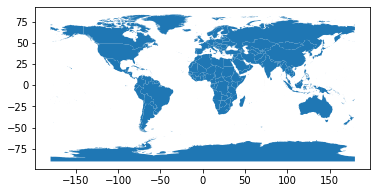

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (100, 100))
gdf = gpd.read_file("Shape file/World_Countries.shp")
print(gdf.shape)
print(gdf.head())
gdf.plot()
plt.show()

In [ ]:
Entries = list(df["Country"].unique())
pd.DataFrame(Entries)

,0
0,Algeria
1,Angola
2,Argentina
3,Australia
4,Austria
...,...
118,Venezuela
119,Vietnam
120,Yemen
121,Zambia


In [ ]:
print(Entries)

['Algeria', 'Angola', 'Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Bolivia', 'Brazil', 'Brunei', 'Bulgaria', 'Canada', 'Chad', 'Chile', 'China', 'China Hong Kong SAR', 'Colombia', 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic', 'Democratic Republic of Congo', 'Denmark', 'Ecuador', 'Egypt', 'Equatorial Guinea', 'Estonia', 'Finland', 'France', 'Gabon', 'Germany', 'Greece', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kuwait', 'Latvia', 'Libya', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malaysia', 'Mexico', 'Mongolia', 'Morocco', 'Mozambique', 'Myanmar', 'Netherlands', 'Netherlands Antilles', 'New Caledonia', 'New Zealand', 'Nigeria', 'North Macedonia', 'Norway', 'Oman', 'Pakistan', 'Papua New Guinea', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Republic of Congo', 'Romania', 'Russian Federation', 'Saudi Arabia', 'Serbia', 'Singapore', 'Slovakia',

In [ ]:
nonCountryEntries = ['China Hong Kong SAR','Russian Federation','Total Africa', 'Total Asia Pacific', 'Total CIS', 'Total Central America', 'Total Eastern Africa', 'Total Europe',
                    'Total European Union', 'Total Middle Africa', 'Total Middle East', 'Total Non-OECD', 'Total North America', 'Total OECD', 'Total S. & Cent. America', 'Total Western Africa']

In [ ]:
pd.set_option("display.max_rows", 100)
pd.merge(pd.DataFrame(df.groupby("Country").get_group("China").isnull().sum()), pd.DataFrame(df.groupby("Country").get_group("China Hong Kong SAR").isnull().sum()) )

TypeError: merge() got an unexpected keyword argument 'axis'

In [ ]:
pd.DataFrame(df.groupby("Country").get_group("China Hong Kong SAR").isnull().sum())/pd.DataFrame(df.groupby("Country").get_group("China Hong Kong SAR")).shape[0]

,0
Country,0.000000
Year,0.000000
pop,0.000000
ISO3166_alpha3,0.000000
ISO3166_numeric,0.000000
Region,0.000000
SubRegion,0.000000
OPEC,0.000000
EU,0.000000
OECD,0.000000
